In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
import xgboost as xgb

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
import tensorflow as tf

In [14]:
from tensorflow import keras

In [15]:
df=pd.read_csv("IPLDATA.csv")


In [16]:
df

,Unnamed: 0,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,0,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,119,10,223,6.000000,11.193277,1
1,1,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,118,10,223,3.000000,11.288136,1
2,2,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,117,10,223,4.000000,11.333333,1
3,3,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,116,10,223,3.000000,11.431034,1
4,4,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,115,10,223,2.400000,11.530435,1
...,...,...,...,...,...,...,...,...,...,...,...
112117,114439,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-191,5,-3,209,20.869565,-229.200000,0
112118,114440,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-193,4,-3,209,20.793103,-289.500000,0
112119,114441,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-193,3,-4,209,20.615385,-386.000000,0
112120,114442,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-194,2,-4,209,20.491525,-582.000000,0


In [17]:
df.columns

Index(['Unnamed: 0', 'batting_team', 'bowling_team', 'city', 'runs_left',
       'balls_left', 'wickets_left', 'total_runs_x', 'cur_run_rate',
       'req_run_rate', 'result'],
      dtype='object')

In [18]:
df=df.drop("Unnamed: 0",axis=1)


In [19]:
df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112122 entries, 0 to 112121
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   batting_team  112122 non-null  object 
 1   bowling_team  112122 non-null  object 
 2   city          112122 non-null  object 
 3   runs_left     112122 non-null  int64  
 4   balls_left    112122 non-null  int64  
 5   wickets_left  112122 non-null  int64  
 6   total_runs_x  112122 non-null  int64  
 7   cur_run_rate  112122 non-null  float64
 8   req_run_rate  112122 non-null  float64
 9   result        112122 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 8.6+ MB


In [21]:
df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
count,112122.000000,112122.000000,112122.000000,112122.000000,112122.000000,112122.000000,112122.000000
mean,11.418196,61.634024,4.642862,162.892795,29.662098,-6.072669,0.414807
std,92.457503,33.873338,3.909942,28.827693,81.633785,56.832658,0.492691
min,-221.000000,-3.000000,-9.000000,68.000000,0.000000,-1326.000000,0.000000
25%,-64.000000,33.000000,2.000000,144.000000,7.148936,-6.000000,0.000000
50%,6.000000,62.000000,5.000000,164.000000,10.857143,4.276596,0.000000
75%,89.000000,91.000000,8.000000,184.000000,24.285714,9.176471,1.000000
max,246.000000,119.000000,10.000000,247.000000,2382.000000,1242.000000,1.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runs_left'>

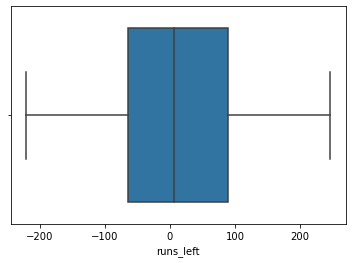

In [22]:
sns.boxplot(df['runs_left'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balls_left'>

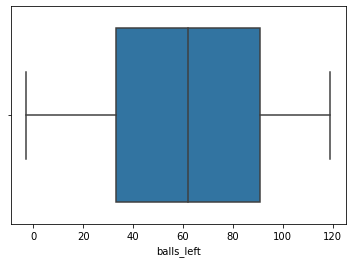

In [23]:
sns.boxplot(df['balls_left'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wickets_left'>

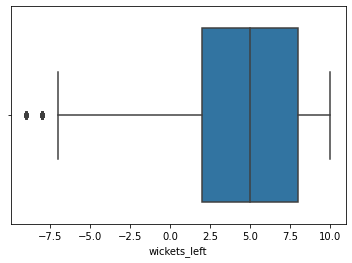

In [24]:
sns.boxplot(df['wickets_left'])

In [25]:
q1=df['wickets_left'].quantile(0.25)

In [26]:
q3=df['wickets_left'].quantile(0.75)

In [27]:
IQR=q3-q1

In [28]:
lower=q1-1.5*IQR

In [29]:
upper=q3+1.5*IQR

In [30]:
df=df[(df['wickets_left']>lower) & (df['wickets_left']<upper)]

In [31]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,119,10,223,6.000000,11.193277,1
1,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,118,10,223,3.000000,11.288136,1
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,117,10,223,4.000000,11.333333,1
3,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,116,10,223,3.000000,11.431034,1
4,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,115,10,223,2.400000,11.530435,1
...,...,...,...,...,...,...,...,...,...,...
112117,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-191,5,-3,209,20.869565,-229.200000,0
112118,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-193,4,-3,209,20.793103,-289.500000,0
112119,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-193,3,-4,209,20.615385,-386.000000,0
112120,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-194,2,-4,209,20.491525,-582.000000,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_runs_x'>

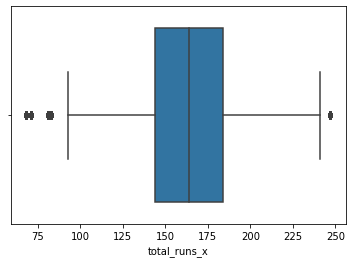

In [32]:
sns.boxplot(df['total_runs_x'])

In [33]:
q1=df['total_runs_x'].quantile(0.25)

In [34]:
q3=df['total_runs_x'].quantile(0.75)

In [35]:
IQR=q3-q1

In [36]:
lower=q1-1.5*IQR

In [37]:
upper=q3+1.5*IQR

In [38]:
df=df[(df['total_runs_x']>lower) & (df['total_runs_x']<upper)]

In [39]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,119,10,223,6.000000,11.193277,1
1,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,118,10,223,3.000000,11.288136,1
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,117,10,223,4.000000,11.333333,1
3,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,116,10,223,3.000000,11.431034,1
4,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,115,10,223,2.400000,11.530435,1
...,...,...,...,...,...,...,...,...,...,...
112117,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-191,5,-3,209,20.869565,-229.200000,0
112118,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-193,4,-3,209,20.793103,-289.500000,0
112119,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-193,3,-4,209,20.615385,-386.000000,0
112120,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-194,2,-4,209,20.491525,-582.000000,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cur_run_rate'>

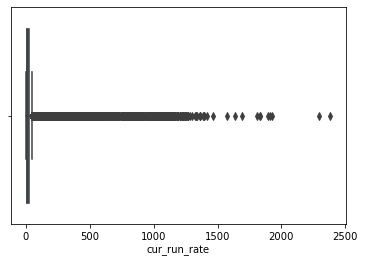

In [40]:
sns.boxplot(df['cur_run_rate'])

In [41]:
q1=df['cur_run_rate'].quantile(0.25)

In [42]:
q3=df['cur_run_rate'].quantile(0.75)

In [43]:
IQR=q3-q1

In [44]:
lower=q1-1.5*IQR

In [45]:
upper=q3+1.5*IQR

In [46]:
df=df[(df['cur_run_rate']>lower) & (df['cur_run_rate']<upper)]

In [47]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,119,10,223,6.000000,11.193277,1
1,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,118,10,223,3.000000,11.288136,1
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,117,10,223,4.000000,11.333333,1
3,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,116,10,223,3.000000,11.431034,1
4,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,115,10,223,2.400000,11.530435,1
...,...,...,...,...,...,...,...,...,...,...
112117,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-191,5,-3,209,20.869565,-229.200000,0
112118,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-193,4,-3,209,20.793103,-289.500000,0
112119,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-193,3,-4,209,20.615385,-386.000000,0
112120,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-194,2,-4,209,20.491525,-582.000000,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='req_run_rate'>

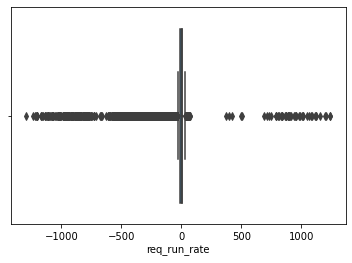

In [48]:
sns.boxplot(df['req_run_rate'])

In [49]:
q1=df['req_run_rate'].quantile(0.25)

In [50]:
q3=df['req_run_rate'].quantile(0.75)

In [51]:
IQR=q3-q1

In [52]:
lower=q1-1.5*IQR

In [53]:
upper=q3+1.5*IQR

In [54]:
df=df[(df['req_run_rate']>lower) & (df['req_run_rate']<upper)]

In [55]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,119,10,223,6.000000,11.193277,1
1,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,118,10,223,3.000000,11.288136,1
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,117,10,223,4.000000,11.333333,1
3,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,116,10,223,3.000000,11.431034,1
4,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,115,10,223,2.400000,11.530435,1
...,...,...,...,...,...,...,...,...,...,...
112088,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-150,34,0,209,25.046512,-26.470588,0
112089,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-151,33,0,209,24.827586,-27.454545,0
112090,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-151,32,0,209,24.545455,-28.312500,0
112091,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-157,31,0,209,24.674157,-30.387097,0


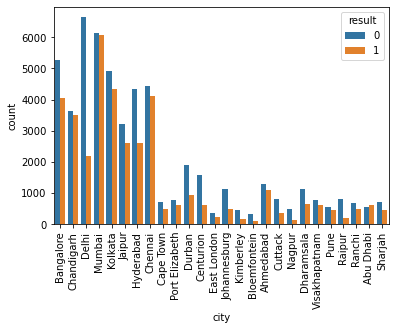

In [56]:
sns.countplot(x=df['city'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

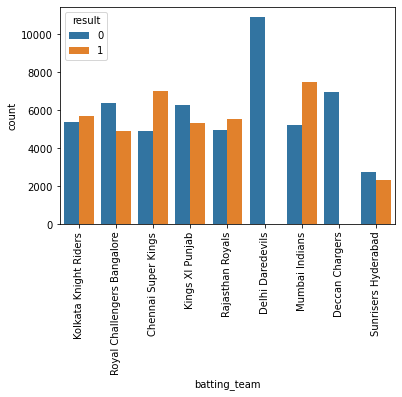

In [57]:
sns.countplot(x=df['batting_team'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

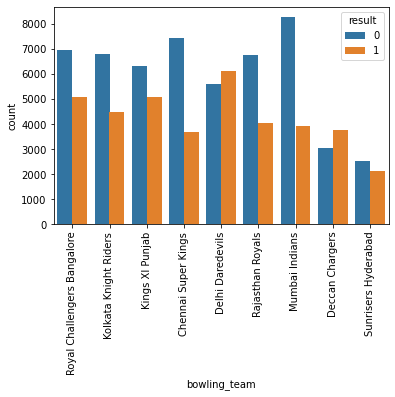

In [58]:
sns.countplot(x=df['bowling_team'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='result', ylabel='cur_run_rate'>

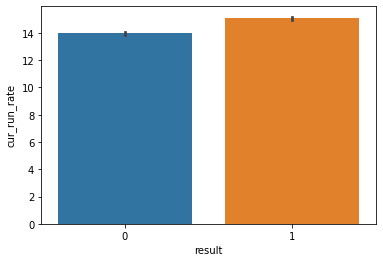

In [59]:
sns.barplot(x=df['result'],y=df['cur_run_rate'])

<AxesSubplot:xlabel='result', ylabel='req_run_rate'>

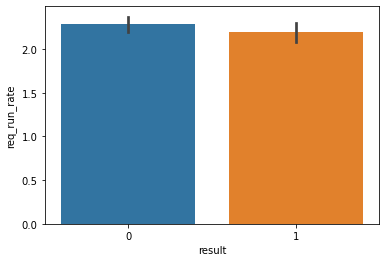

In [60]:
sns.barplot(x=df['result'],y=df['req_run_rate'])

<AxesSubplot:xlabel='result', ylabel='total_runs_x'>

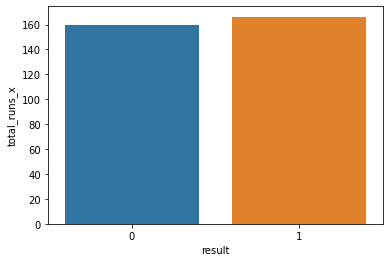

In [61]:
sns.barplot(x=df['result'],y=df['total_runs_x'])

<AxesSubplot:xlabel='result', ylabel='wickets_left'>

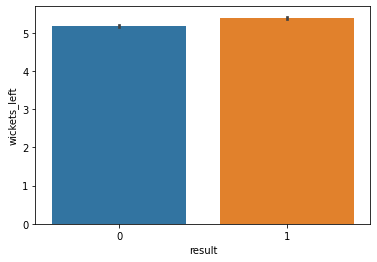

In [62]:
sns.barplot(x=df['result'],y=df['wickets_left'])

<AxesSubplot:xlabel='result', ylabel='balls_left'>

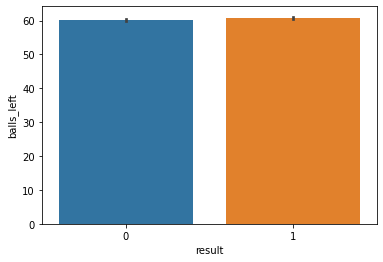

In [63]:
sns.barplot(x=df['result'],y=df['balls_left'])

<AxesSubplot:xlabel='result', ylabel='runs_left'>

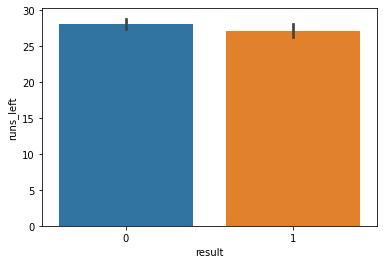

In [64]:
sns.barplot(x=df['result'],y=df['runs_left'])

In [65]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,119,10,223,6.000000,11.193277,1
1,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,118,10,223,3.000000,11.288136,1
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,117,10,223,4.000000,11.333333,1
3,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,116,10,223,3.000000,11.431034,1
4,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,115,10,223,2.400000,11.530435,1
...,...,...,...,...,...,...,...,...,...,...
112088,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-150,34,0,209,25.046512,-26.470588,0
112089,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-151,33,0,209,24.827586,-27.454545,0
112090,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-151,32,0,209,24.545455,-28.312500,0
112091,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-157,31,0,209,24.674157,-30.387097,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='runs_left', ylabel='Density'>

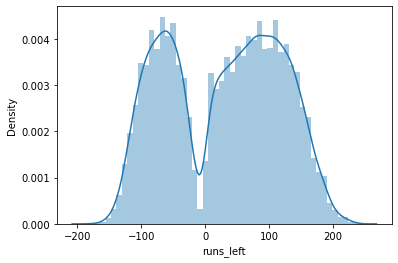

In [66]:
sns.distplot(df['runs_left'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balls_left', ylabel='Density'>

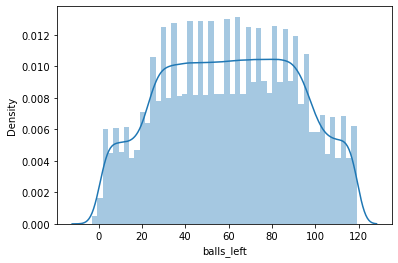

In [67]:
sns.distplot(df['balls_left'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wickets_left', ylabel='Density'>

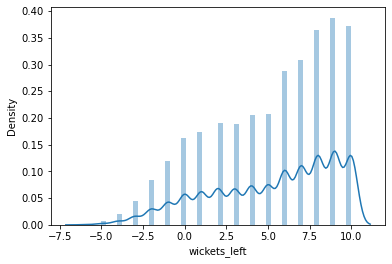

In [68]:
sns.distplot(df['wickets_left'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_runs_x', ylabel='Density'>

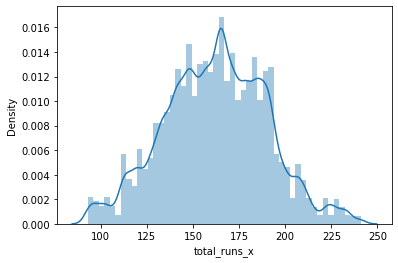

In [69]:
sns.distplot(df['total_runs_x'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cur_run_rate', ylabel='Density'>

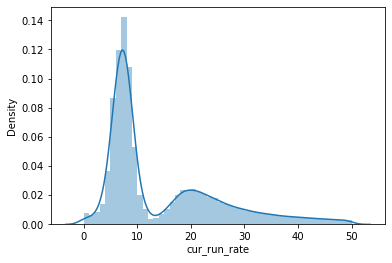

In [70]:
sns.distplot(df['cur_run_rate'])

In [71]:
df['cur_run_rate']=np.log(df['cur_run_rate'])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himanshu\AppData\Local\Temp\ipykernel_30928\1173997685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cur_run_rate']=np.log(df['cur_run_rate'])


In [72]:
df=df[df['cur_run_rate']>0]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cur_run_rate', ylabel='Density'>

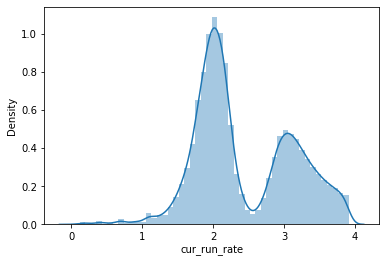

In [73]:
sns.distplot(df['cur_run_rate'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='req_run_rate', ylabel='Density'>

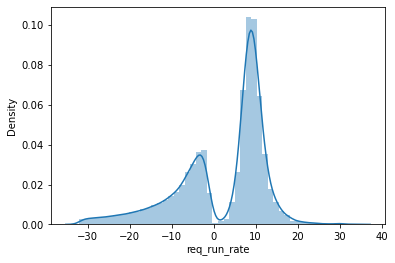

In [74]:
sns.distplot(df['req_run_rate'])

In [75]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,119,10,223,1.791759,11.193277,1
1,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,118,10,223,1.098612,11.288136,1
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,117,10,223,1.386294,11.333333,1
3,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,116,10,223,1.098612,11.431034,1
4,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,115,10,223,0.875469,11.530435,1
...,...,...,...,...,...,...,...,...,...,...
112088,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-150,34,0,209,3.220735,-26.470588,0
112089,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-151,33,0,209,3.211955,-27.454545,0
112090,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-151,32,0,209,3.200527,-28.312500,0
112091,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-157,31,0,209,3.205756,-30.387097,0


<AxesSubplot:xlabel='result', ylabel='cur_run_rate'>

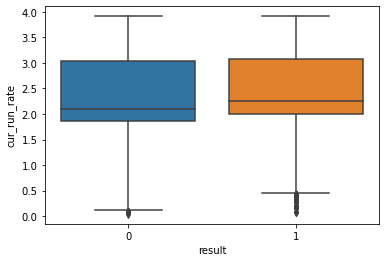

In [76]:
sns.boxplot(x=df['result'],y=df['cur_run_rate'])

<AxesSubplot:xlabel='result', ylabel='req_run_rate'>

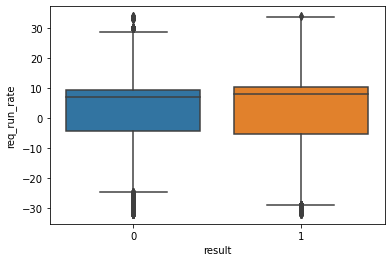

In [77]:
sns.boxplot(x=df['result'],y=df['req_run_rate'])

<AxesSubplot:xlabel='result', ylabel='total_runs_x'>

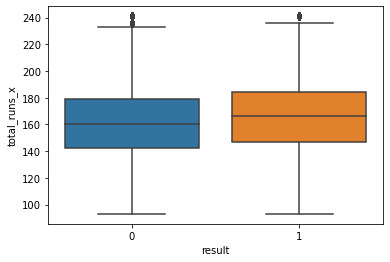

In [78]:
sns.boxplot(x=df['result'],y=df['total_runs_x'])

<AxesSubplot:xlabel='result', ylabel='wickets_left'>

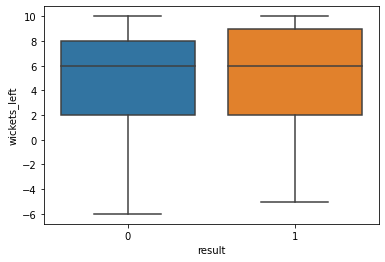

In [79]:
sns.boxplot(x=df['result'],y=df['wickets_left'])

<AxesSubplot:xlabel='result', ylabel='balls_left'>

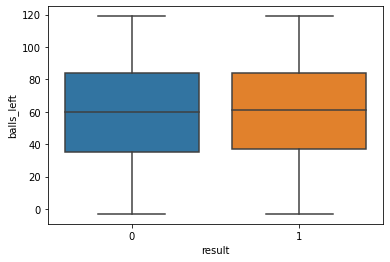

In [80]:
sns.boxplot(x=df['result'],y=df['balls_left'])

<AxesSubplot:xlabel='result', ylabel='runs_left'>

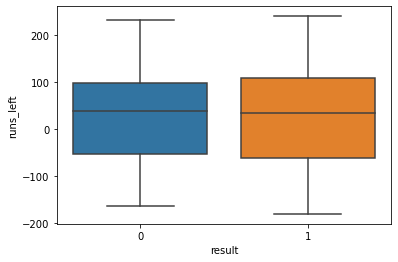

In [81]:
sns.boxplot(x=df['result'],y=df['runs_left'])

In [82]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,119,10,223,1.791759,11.193277,1
1,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,118,10,223,1.098612,11.288136,1
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,117,10,223,1.386294,11.333333,1
3,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,116,10,223,1.098612,11.431034,1
4,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,115,10,223,0.875469,11.530435,1
...,...,...,...,...,...,...,...,...,...,...
112088,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-150,34,0,209,3.220735,-26.470588,0
112089,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-151,33,0,209,3.211955,-27.454545,0
112090,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-151,32,0,209,3.200527,-28.312500,0
112091,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-157,31,0,209,3.205756,-30.387097,0


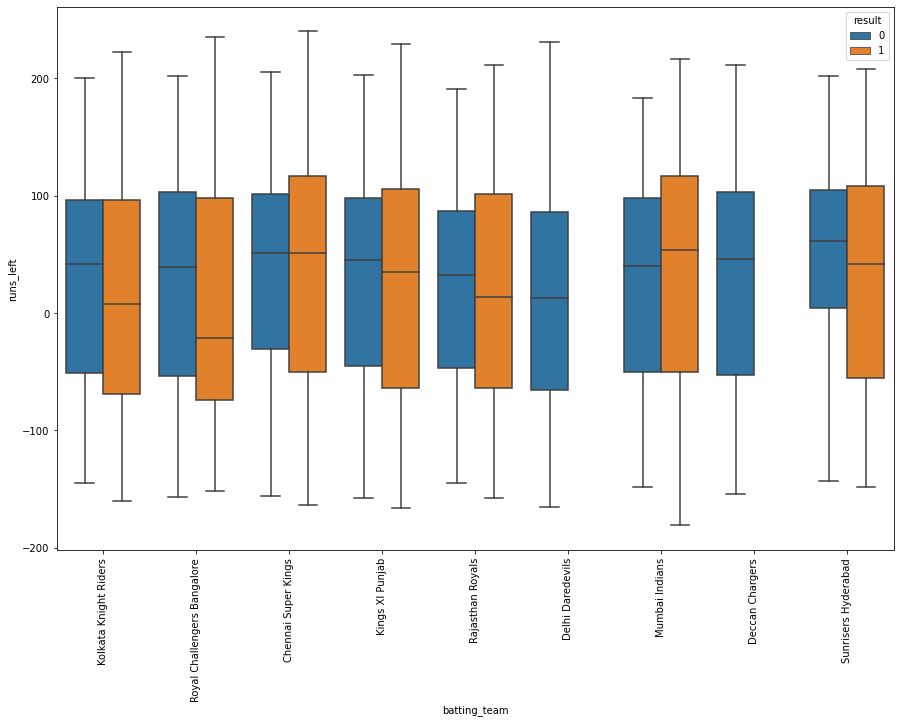

In [83]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['batting_team'],y=df['runs_left'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

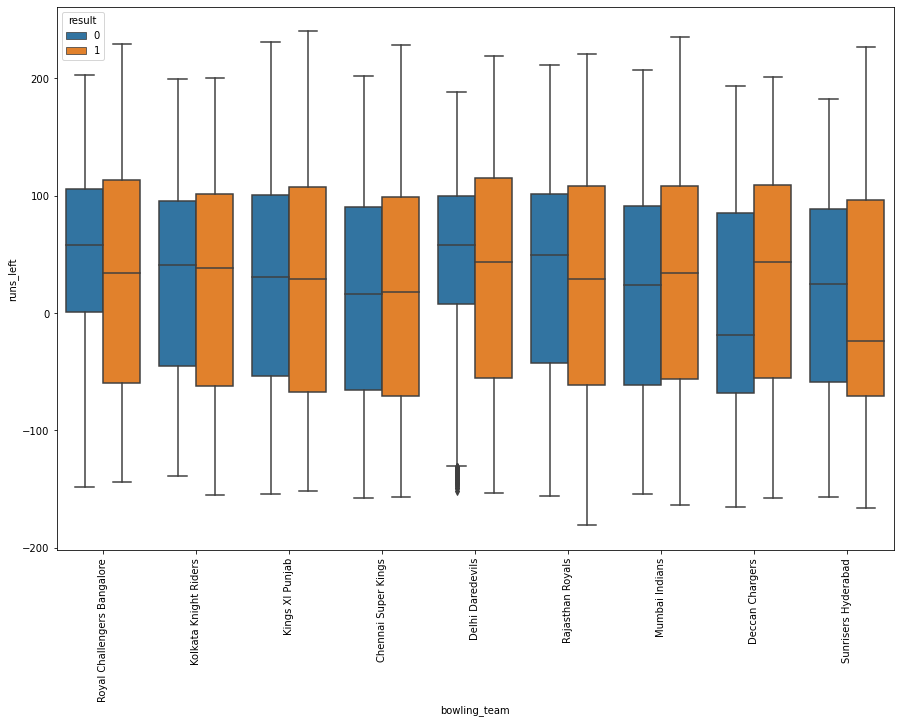

In [84]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['bowling_team'],y=df['runs_left'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

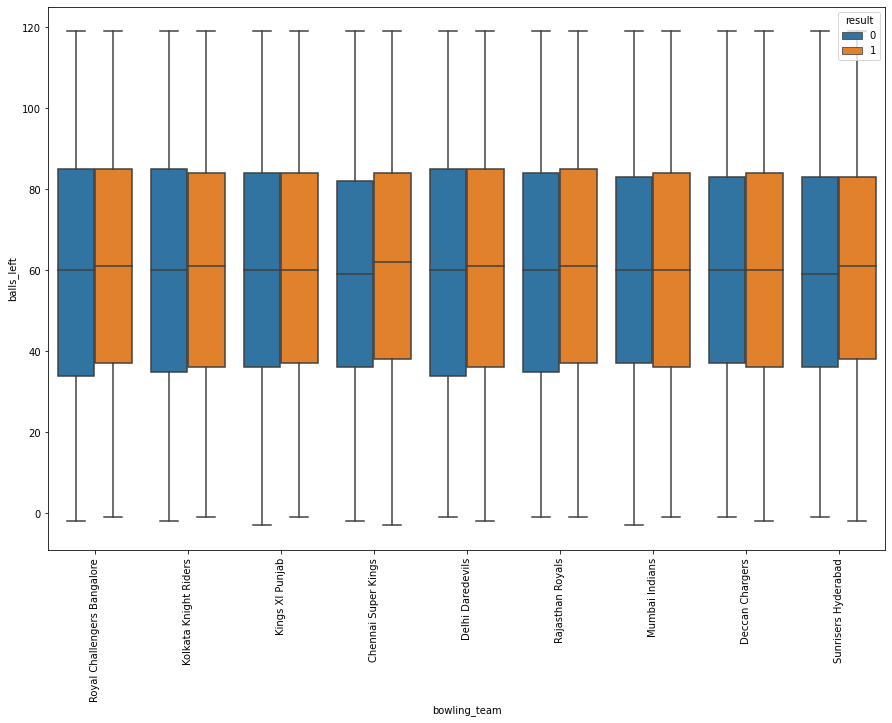

In [85]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['bowling_team'],y=df['balls_left'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

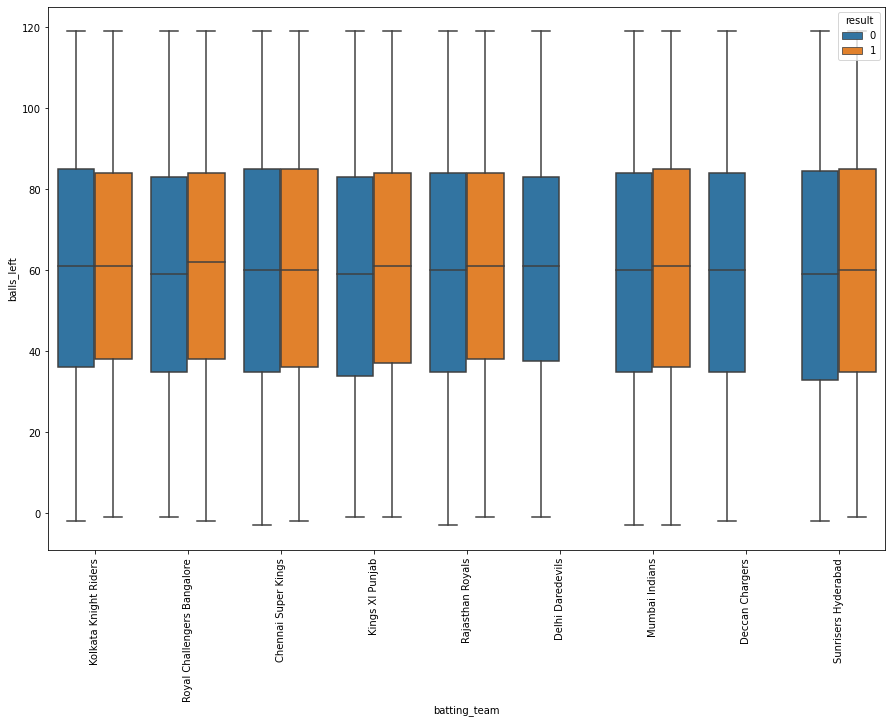

In [86]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['batting_team'],y=df['balls_left'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

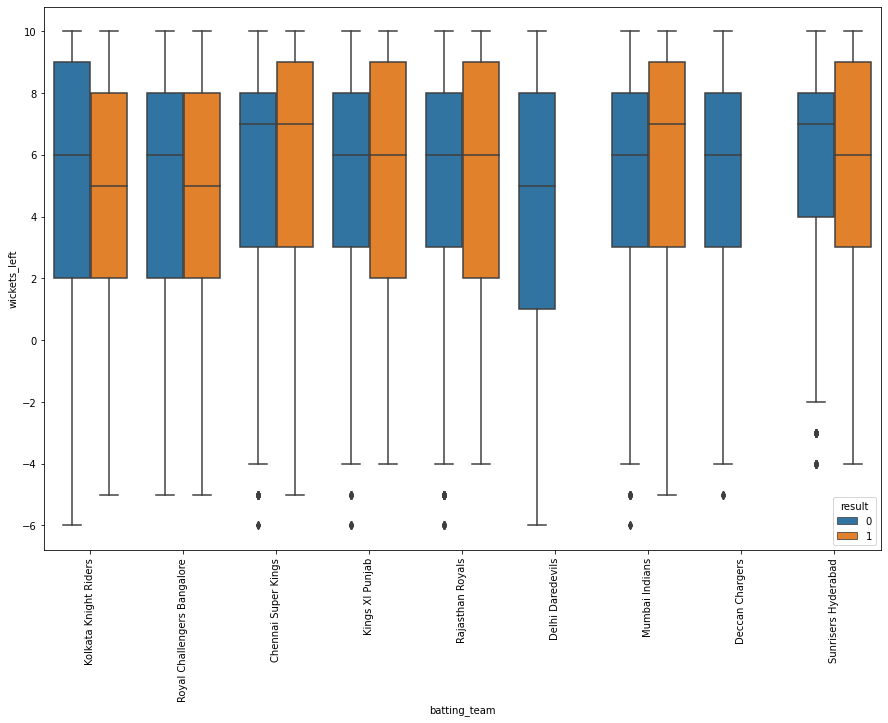

In [87]:

plt.figure(figsize=(15,10))
sns.boxplot(x=df['batting_team'],y=df['wickets_left'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

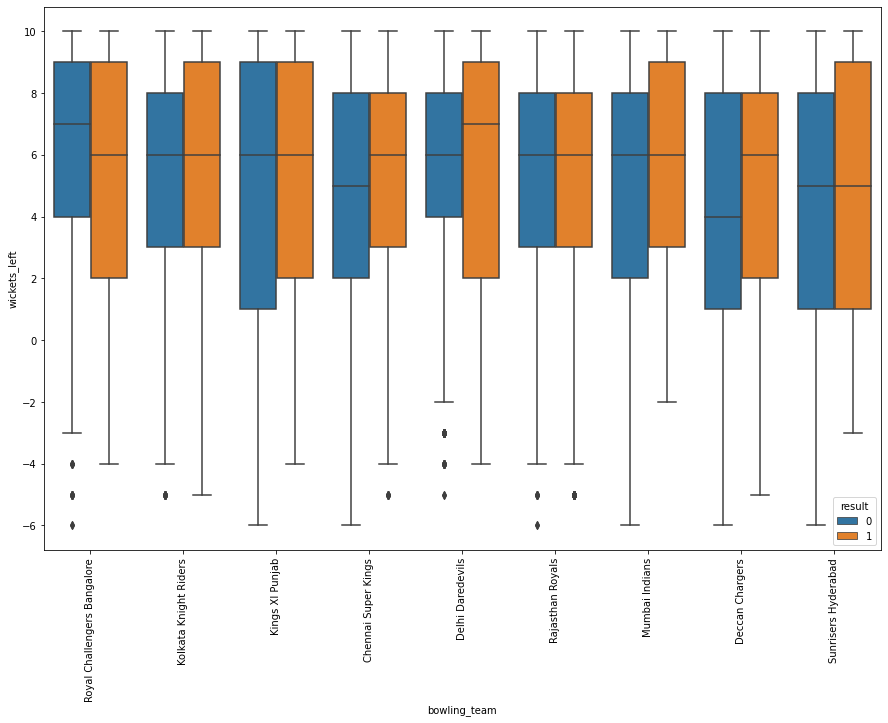

In [88]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['bowling_team'],y=df['wickets_left'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

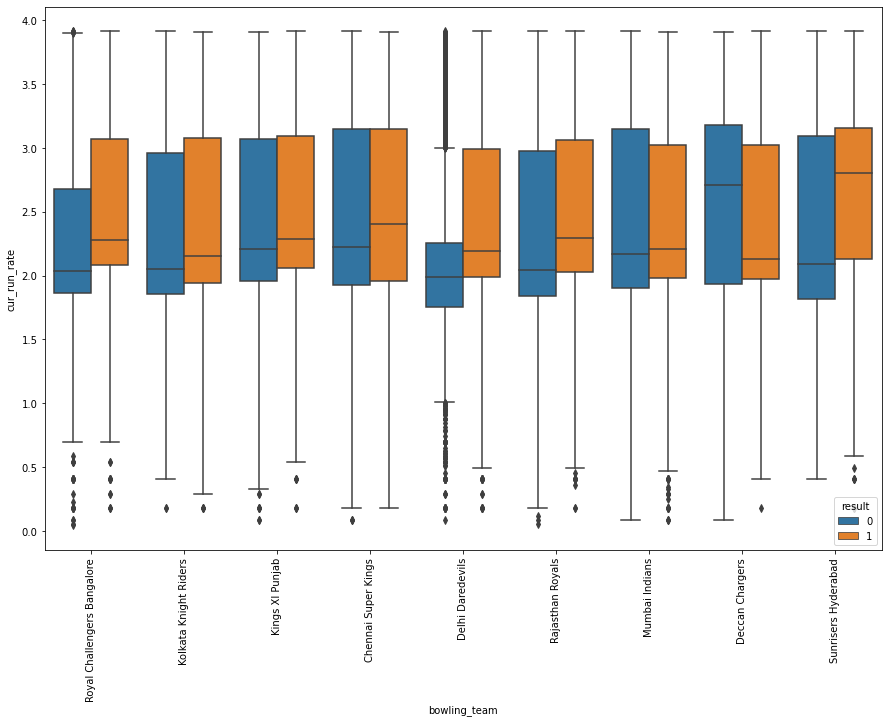

In [89]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['bowling_team'],y=df['cur_run_rate'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

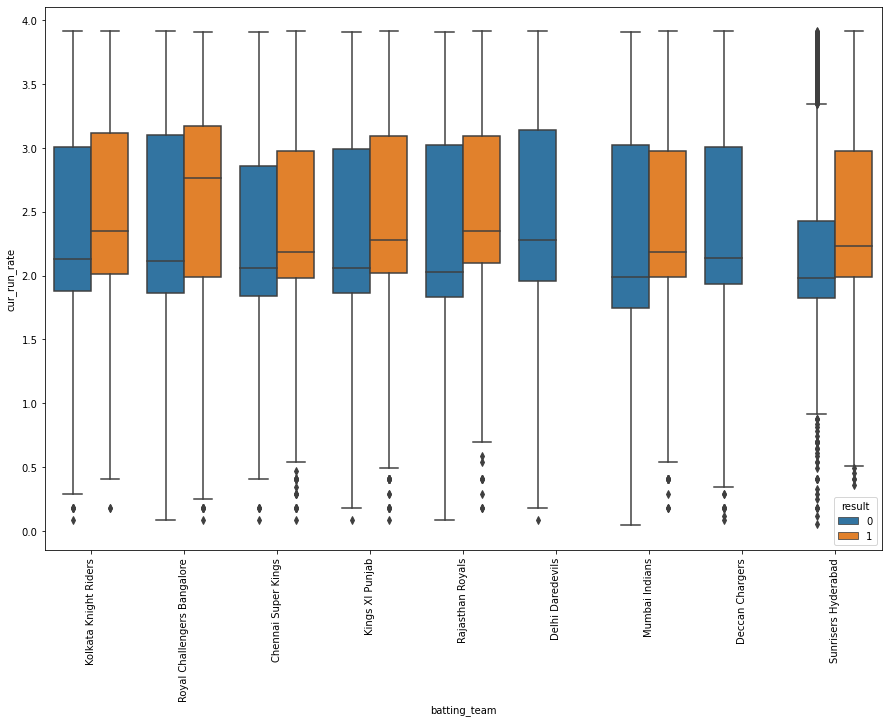

In [90]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['batting_team'],y=df['cur_run_rate'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

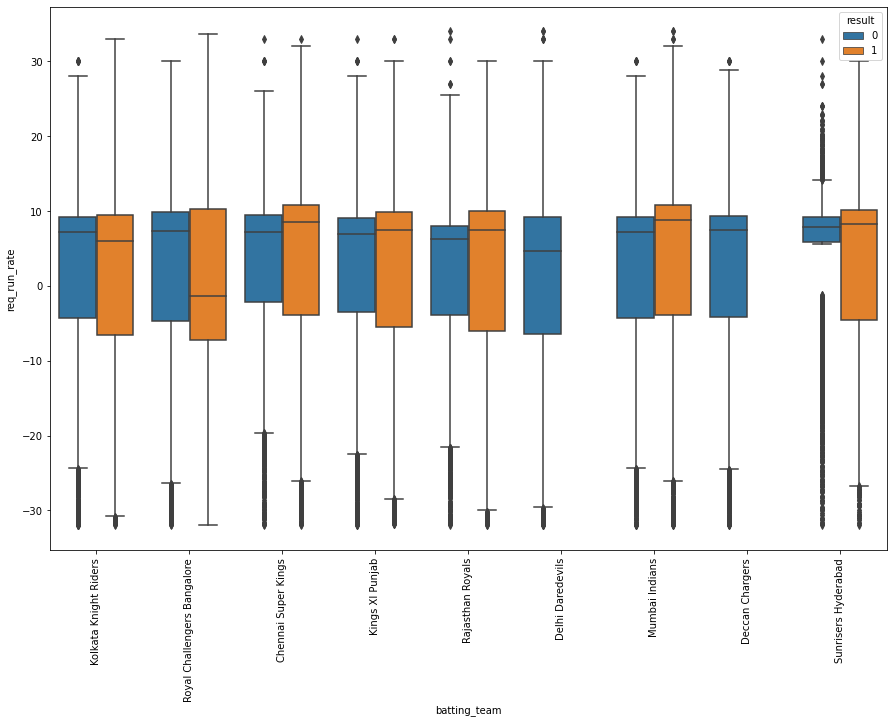

In [91]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['batting_team'],y=df['req_run_rate'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

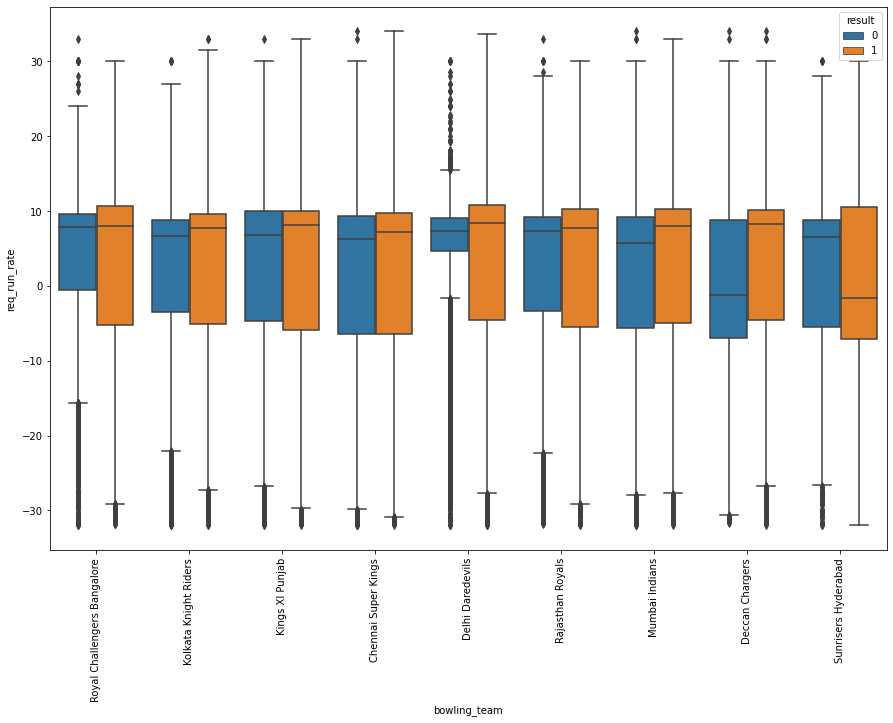

In [92]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['bowling_team'],y=df['req_run_rate'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

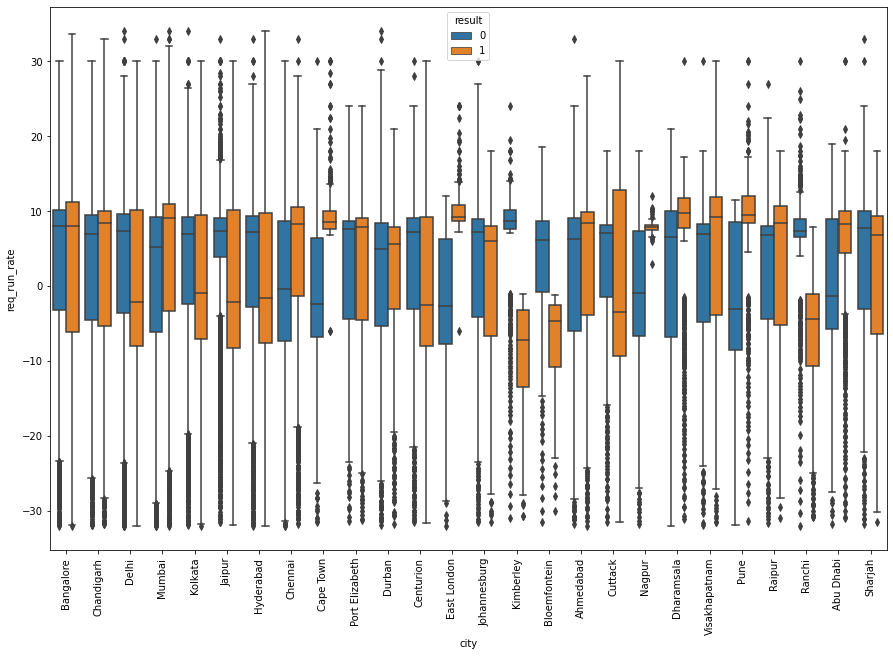

In [93]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['city'],y=df['req_run_rate'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

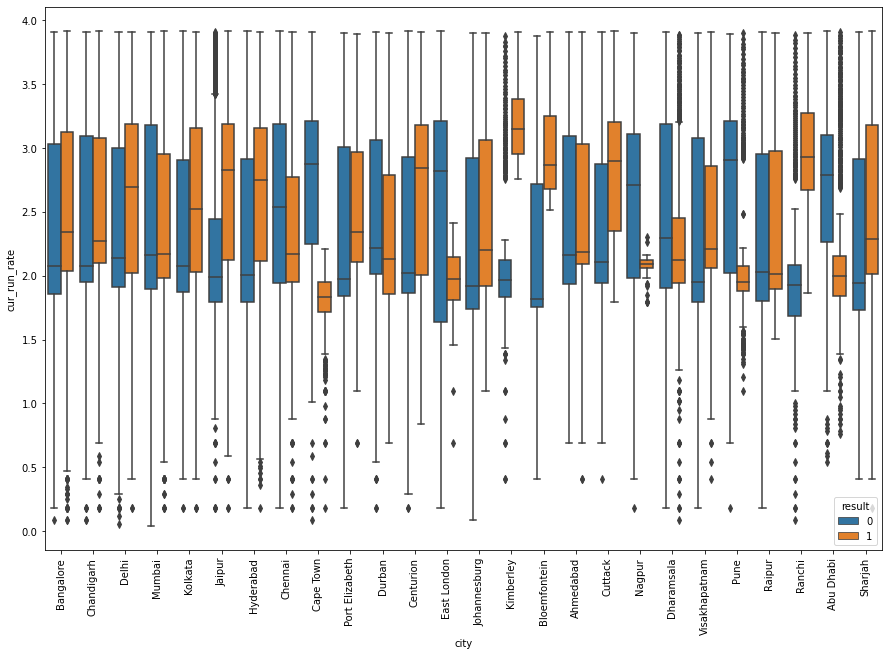

In [94]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['city'],y=df['cur_run_rate'],hue=df['result'])
plt.xticks(rotation=90)
plt.show()

In [95]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,119,10,223,1.791759,11.193277,1
1,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,222,118,10,223,1.098612,11.288136,1
2,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,117,10,223,1.386294,11.333333,1
3,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,116,10,223,1.098612,11.431034,1
4,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,221,115,10,223,0.875469,11.530435,1
...,...,...,...,...,...,...,...,...,...,...
112088,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-150,34,0,209,3.220735,-26.470588,0
112089,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-151,33,0,209,3.211955,-27.454545,0
112090,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-151,32,0,209,3.200527,-28.312500,0
112091,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,-157,31,0,209,3.205756,-30.387097,0


In [96]:
le=LabelEncoder()

In [97]:
df['batting_team']=le.fit_transform(df['batting_team'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_30928\3896506699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batting_team']=le.fit_transform(df['batting_team'])


In [98]:
df['bowling_team']=le.fit_transform(df['bowling_team'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_30928\3632912560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bowling_team']=le.fit_transform(df['bowling_team'])


In [99]:
df['city']=le.fit_transform(df['city'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_30928\4177283978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city']=le.fit_transform(df['city'])


In [100]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,cur_run_rate,req_run_rate,result
0,4,7,2,222,119,10,223,1.791759,11.193277,1
1,4,7,2,222,118,10,223,1.098612,11.288136,1
2,4,7,2,221,117,10,223,1.386294,11.333333,1
3,4,7,2,221,116,10,223,1.098612,11.431034,1
4,4,7,2,221,115,10,223,0.875469,11.530435,1
...,...,...,...,...,...,...,...,...,...,...
112088,7,8,2,-150,34,0,209,3.220735,-26.470588,0
112089,7,8,2,-151,33,0,209,3.211955,-27.454545,0
112090,7,8,2,-151,32,0,209,3.200527,-28.312500,0
112091,7,8,2,-157,31,0,209,3.205756,-30.387097,0


In [101]:
df['result'].value_counts()

0    53244
1    38011
Name: result, dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

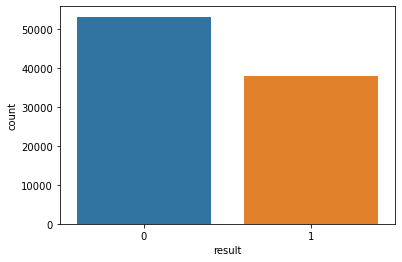

In [102]:
sns.countplot(df['result'])

In [103]:
y=df['result']

In [104]:
X=df.drop('result',axis=1)

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
smote=SMOTE(sampling_strategy='minority')

In [107]:
X,y=smote.fit_resample(X,y)


In [108]:
sc=StandardScaler()

In [109]:
X=sc.fit_transform(X)


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [111]:
X_train.shape

(85190, 9)

In [112]:
X_test.shape

(21298, 9)

# LogisticRegression

In [113]:
lr=LogisticRegression()

In [114]:
lr.fit(X_train,y_train)

LogisticRegression()

In [115]:
y_pred=lr.predict(X_train)


In [116]:
y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [117]:
accuracy_score(y_train,y_pred)

0.6071017725085104

In [118]:
y_pred=lr.predict(X_test)


In [119]:
y_pred

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [120]:
accuracy_score(y_test,y_pred)

0.6040003756221242

In [121]:
cm=confusion_matrix(y_test,y_pred)

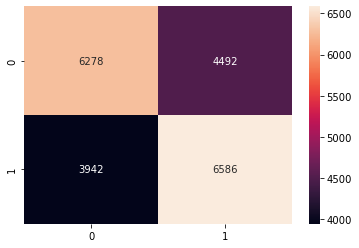

In [122]:
sns.heatmap(data=cm,fmt='d',annot=True)
plt.show()

In [123]:
KF=KFold(5)


In [124]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)

In [125]:
for index,value in enumerate(scores):
    print(index,value)

0 0.604225352112676
1 0.606338028169014
2 0.5964788732394366
3 0.6184550363935196
4 0.6013148626438131


In [126]:
scores.mean()

0.6053624305116919

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.58      0.60     10770
           1       0.59      0.63      0.61     10528

    accuracy                           0.60     21298
   macro avg       0.60      0.60      0.60     21298
weighted avg       0.60      0.60      0.60     21298



# XGBClassifier

In [128]:
xgb_i=xgb.XGBClassifier()

In [129]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [130]:
y_pred=xgb_i.predict(X_train)


In [131]:
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [132]:
accuracy_score(y_train,y_pred)

0.9983331376922174

In [133]:
y_pred=xgb_i.predict(X_test)


In [134]:
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [135]:
accuracy_score(y_test,y_pred)

0.9978401727861771

In [136]:
cm=confusion_matrix(y_test,y_pred)

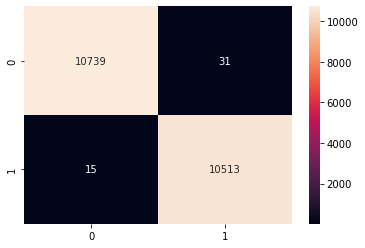

In [137]:
sns.heatmap(data=cm,fmt='d',annot=True)
plt.show()

In [138]:
KF=KFold(5)


In [139]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)

In [140]:
for index,value in enumerate(scores):
    print(index,value)

0 0.9936619718309859
1 0.9931924882629108
2 0.9906103286384976
3 0.9955388588870627
4 0.9908429208734445


In [141]:
scores.mean()

0.9927693136985803

In [142]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10770
           1       1.00      1.00      1.00     10528

    accuracy                           1.00     21298
   macro avg       1.00      1.00      1.00     21298
weighted avg       1.00      1.00      1.00     21298



# RandomForestClassifier

In [143]:
rfc=RandomForestClassifier()

In [144]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
y_pred=rfc.predict(X_train)


In [146]:
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [147]:
accuracy_score(y_train,y_pred)

0.9999530461321752

In [148]:
y_pred=rfc.predict(X_test)


In [149]:
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [150]:
accuracy_score(y_test,y_pred)

0.9988731336275707

In [151]:
cm=confusion_matrix(y_test,y_pred)

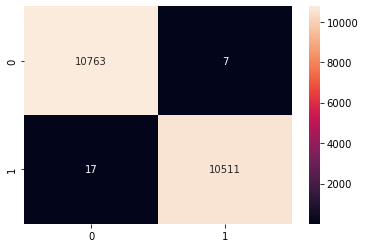

In [152]:
sns.heatmap(data=cm,fmt='d',annot=True)
plt.show()

In [153]:
KF=KFold(5)


In [154]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)

In [155]:
for index,value in enumerate(scores):
    print(index,value)

0 0.9924882629107982
1 0.992018779342723
2 0.9901408450704225
3 0.9934256867809345
4 0.9922517022775299


In [156]:
scores.mean()

0.9920650552764816

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10770
           1       1.00      1.00      1.00     10528

    accuracy                           1.00     21298
   macro avg       1.00      1.00      1.00     21298
weighted avg       1.00      1.00      1.00     21298



# KNeighborsClassifier

In [158]:
knc=KNeighborsClassifier()

In [159]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [160]:
y_pred=knc.predict(X_train)


In [161]:
y_pred

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [162]:
accuracy_score(y_train,y_pred)

0.9958915365653246

In [163]:
y_pred=knc.predict(X_test)


In [164]:
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [165]:
accuracy_score(y_test,y_pred)

0.9942248098412997

In [166]:
cm=confusion_matrix(y_test,y_pred)

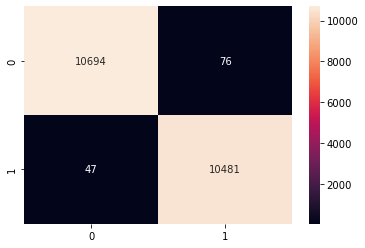

In [167]:
sns.heatmap(data=cm,fmt='d',annot=True)
plt.show()

In [168]:
KF=KFold(5)


In [169]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)

In [170]:
for index,value in enumerate(scores):
    print(index,value)

0 0.9460093896713615
1 0.9424882629107981
2 0.9455399061032864
3 0.9504578539563278
4 0.9424747593331768


In [171]:
scores.mean()

0.94539403439499

In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10770
           1       0.99      1.00      0.99     10528

    accuracy                           0.99     21298
   macro avg       0.99      0.99      0.99     21298
weighted avg       0.99      0.99      0.99     21298



# Neural Network

In [173]:
model=keras.Sequential([
    keras.layers.Dense(30,input_shape=(9,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [174]:
model.compile(
optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy'])

In [175]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
2663/2663 [==============================] - 5s 2ms/step - loss: 0.5473 - accuracy: 0.7198
Epoch 2/10
2663/2663 [==============================] - 5s 2ms/step - loss: 0.4561 - accuracy: 0.7899
Epoch 3/10
2663/2663 [==============================] - 4s 1ms/step - loss: 0.4029 - accuracy: 0.8148
Epoch 4/10
2663/2663 [==============================] - 5s 2ms/step - loss: 0.3690 - accuracy: 0.8311
Epoch 5/10
2663/2663 [==============================] - 4s 2ms/step - loss: 0.3468 - accuracy: 0.8405
Epoch 6/10
2663/2663 [==============================] - 4s 2ms/step - loss: 0.3306 - accuracy: 0.8502
Epoch 7/10
2663/2663 [==============================] - 5s 2ms/step - loss: 0.3144 - accuracy: 0.8597
Epoch 8/10
2663/2663 [==============================] - 5s 2ms/step - loss: 0.3029 - accuracy: 0.8684
Epoch 9/10
2663/2663 [==============================] - 5s 2ms/step - loss: 0.2911 - accuracy: 0.8763
Epoch 10/10
2663/2663 [==============================] - 5s 2ms/step - loss: 0.281

In [176]:
model.evaluate(X_test,y_test)

666/666 [==============================] - 1s 816us/step - loss: 0.2695 - accuracy: 0.8896


[0.2694849967956543, 0.8896140456199646]

In [177]:
y_pred=model.predict(X_test)


666/666 [==============================] - 0s 553us/step


In [178]:
y_pred

array([[9.9073833e-01],
       [1.5587477e-01],
       [9.9936712e-01],
       ...,
       [8.1119460e-01],
       [9.7167009e-01],
       [3.3370004e-04]], dtype=float32)

In [179]:
ypred=[]

for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)
        

In [180]:
ypred[:10]

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [181]:
y_test[:10]

48690     1
50628     0
101180    1
15808     0
96215     1
53181     1
53999     1
54156     1
81764     1
60358     0
Name: result, dtype: int64

In [182]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89     10770
           1       0.87      0.92      0.89     10528

    accuracy                           0.89     21298
   macro avg       0.89      0.89      0.89     21298
weighted avg       0.89      0.89      0.89     21298



In [183]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=ypred)

In [184]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[9287, 1483],
       [ 868, 9660]])>

<AxesSubplot:>

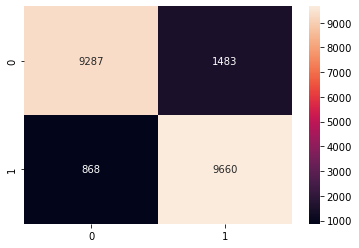

In [185]:
sns.heatmap(data=cm,fmt='d',annot=True)